In [1]:
import torch
import copy
import argparse
import numpy as np
from numpy import genfromtxt
import difflib
import matplotlib
import seaborn as sns; sns.set()
from matplotlib import colors
from matplotlib import pyplot as plt
%matplotlib notebook

### Specify parameters 

In [2]:
N = 50 # No. of input nodes i.e. behaviours
R = 50 # No. of descending neurons i.e. bottleneck layer
M = N # No. of motor units, output
n = 5 # No. of responding output nodes
fn = n/M # Fraction of output nodes that are responding
response_threshold = 0.5 # Whether an input corresponds to activating the node or not
loss_series = []

### Generate input matrix with 1 on diagonal

In [3]:
x_in = [[1 if i==j else 0 for i in range(N)] for j in range(N)]
x = torch.tensor(x_in).float()

### Function for modular generation 

In [4]:
def generate_out_matrix(dim, nresponding, nclust, nnoise):
    # dim - dimensions of matrix (assuming it's square for now)
    # nresponding - number of neurons to activate per behavior (sparcity)
    # nclust - number of clusters
    # nnoise - number of "imperfect" neurons outside of cluster
    out=np.zeros((dim,dim))
    length=list(range(dim))
    for i in range(nclust):
        set1=list(range(int(i*dim/nclust), int((i+1)*dim/nclust)))      ### inside dense cluster
        set2=length[:int(i*dim/nclust)]+length[int((i+1)*dim/nclust):]  ### outside dense cluster
        for j in set1:
            out[j,np.random.choice(set1, nresponding-nnoise, replace=False)]=1
            out[j,np.random.choice(set2, nnoise, replace=False)]=1
    return out

### Generate matrix and look

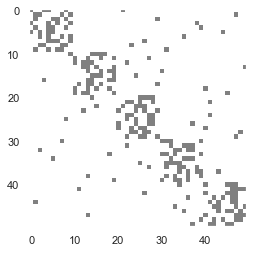

In [5]:
y_out=generate_out_matrix(dim=N, nresponding=n, nclust=5, nnoise=1)

cmap = colors.ListedColormap(["white", "grey"])
bounds = [0, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
ax.imshow(y_out, cmap=cmap, norm=norm)
ax.grid(False) # no gridlines


### Save matrices 

In [6]:
it_ind=0
np.savetxt('x_in_' + str(it_ind) + '_' + str(N)  + '.csv', x_in)
np.savetxt('y_out_' + str(it_ind) + '_' + str(N)  + '.csv', y_out)